In [1]:
%matplotlib widget
from helper import *

<div style="font-family: 'Helvetica Neue', Arial, sans-serif;padding: 10px; text-align: center;">


<div style="margin-top: 10px; display: flex;">
    <div style="max-width: 600px; margin-right: auto">
        <img src="./resources/neura_logo_groß.png" alt="Neura Robotics Logo" style="max-width: 100%; height: auto; object-fit: contain;">
    </div>
    <div style="max-width: 500px; margin-left: auto">
        <img src="./resources/rwth_igmr_de_rgb.png" alt="Neura Robotics Logo" style="max-width: 100%; height: auto; object-fit: contain;">
    </div>
</div>   
<div style="font-family: 'Helvetica Neue', Arial, sans-serif; max-width: 1500px; margin-left: auto; margin-right: auto ">
<h2 style = "text-align: center">Dual Quaternion Quintic Blends: $\mathcal{C}^2$-Continuous, Time-Optimized Interpolation with Unit Dual Quaternion Pose Representation</h2>
    <p style = "text-align: center">Authors: Jens Temminghoff, Marcel Huptych, Jan Wiartalla, Markus Schmitz, Burkhard Corves, Mathias Hüsing</p>
</div>

<div style="margin-bottom: 40px;">
    <!-- Using the logo from the data folder and making it bigger -->
    <img src="./resources/maira.png" alt="Neura Robotics Logo" style="max-width: 1800px; width: 100%;">
</div>

</div>

# Motivation
----
- Cobot solutions need to be intuitive, easy to use, and easy to program by non-expert users
- **Hand Guiding Mode** preferred to teach complex motion tasks
- **long/short path orientation interpolation** is an unkown concept for most people
- **Dual Quaternions pose representation** provide solutions to these problems

In [2]:
%%HTML
<video width="1100" height="700" controls>
  <source src=".\resources\example.mov" type="video/mp4">
</video>

# State of the Art
---

<table style="border-collapse: collapse; width: 80%; margin: 0 auto; font-size: 24px;">
    <thead>
      <tr>
        <th style=" width: 400px; border: 1px solid #d3d3d3; padding: 8px; text-align: center;">Requirements</th>
        <th style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">DLB [1]</th>
        <th style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">ScLERP [2]</th>
        <th style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">SEP(LERP) [1]</th>
        <th style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">Bézier [3]</th>
        <th style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">SCB [4]</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">decoupled interpolation</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">-</td>
      </tr>
      <tr>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">multi-point interpolation</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
      </tr>
      <tr>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">definable motionprofiles</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">-</td>
      </tr>
      <tr>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">constant velocity</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
      </tr>
      <tr>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;"> $\mathcal{C}^2$-Continuous</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
      </tr>
      <tr>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">translation interpolation</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">no</td>
      </tr>
      <tr>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">orientation interpolation</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
        <td style="border: 1px solid #d3d3d3; padding: 8px; text-align: center;">yes</td>
      </tr>
    </tbody>
  </table>
  
<p style="text-align: center;"><strong>Table 1</strong>: Comparison of existing interpolation methods.</p>

# Dual Quaternions
---
Three-dimensional rigid transformations are usually represented by homogeneous transformation matrices $T \in \mathcal{SE}(3)$. The *Special Euclidean Group* $\mathcal{SE}(3)$ is given by the semi-direct product of rotation matrices and translation vectors:

$$
\mathcal{SE}(3) = \mathcal{SO}(3) \ltimes \mathbb{R}^{3}
$$

The unit *Dual Quaternion Space* is then given by the semi-direct product of $\mathcal{S}^3$ and $\mathbb{R}^{3}$: 

$$
\mathbb{H} = \mathcal{S}^3 \ltimes \mathbb{R}^{3}
$$

With the space of unit quaternions $\mathcal{S}^3$ and the translation vectors $\mathbb{R}^{3}$.

# Dual Quaternions
---
A unit dual quaternion $\underline{\xi} \in \mathbb{H}$ can be written as

$$
\underline{\xi} = \hat{r} + \epsilon \frac{1}{2}\bar{t} \otimes \hat{r}
$$

where:
- unit quaternion $\hat{r} \in \mathcal{S}^3$ representing orientation
- pure quaternion $\bar{t} \in \mathbb{R}^{3}$ representing translation
- dual unit $\epsilon$, with $\epsilon^2 = 0$ and  $\epsilon \neq 0$.

In [3]:
r = Quaternion(0.7071, 0.7071, 0, 0)
t = Quaternion(0, 1, 2, 1.5)

dual_quaternion = DualQuaternion(r, 0.5*t*r)
print(dual_quaternion)

DualQuaternion(Real: Quaternion(0.707, 0.707, 0.000, 0.000), Dual: Quaternion(-0.354, 0.354, 1.237, -0.177))


# Dual Quaternions: Advantages
---

Dual Quaternions inherit benefitial properties from the quaternions. 

These properties include:
- The **Double Cover Property** (or *Antipodal Property*)
- The **Singularity Free Representation**
- The **High Efficiency** in representing transformations

# Example: Double Cover Property
---

<img src="resources/quaternion_double_cover.png" alt="Alt text" style="width: 1000px; margin: auto;"/>


# Dual Quaternion Quintic Blends (DQQB) algorithm
---

- can handle Linear and Arc Motion segments, and a combination of both
- Segments are defined via UDQ poses
- Line is defined by 2 UDQ poses, Arc segment are defined by 3 UDQ poses
- blending between segments

# DQQB Structure
---
- **Algorithm 1**: Iterative Offline Optimization 
    - Input : segments, desired linear velocity, motion limits
    - output: motion parameters for Algorithm 2
    - iteratively optimizes the blending times and segement durations for time optimal interpolation within given limits
    - average time for 4 via points: 150 $\mu s$
- **Algorithm 2**: Fast Online Interpolation
     - Input: Output of Algorithm 1
     - Output: Interpolated Dual Quaternion State
     - average evalutation duration: < 1 $\mu s$
     

<img src="resources/algo1.png" alt="Alt text" style="width: 1200px; margin: auto; margin-top: 50px;"/>

<img src="resources/algo2.png" alt="Alt text" style="width: 1200px; margin: auto; margin-top: 50px;"/>

# Example of DQQB Interpolator
---

In [4]:
# define Dual Quaternion poses
xi1 = DualQuaternion.basicConstructor(0.454, -0.891, 0.0, 0.0,  -0.178, -0.91, 0.0, 0.0)
xi2 = DualQuaternion.basicConstructor(0.454, -0.891, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0)
xi3 = DualQuaternion.basicConstructor(0.321, -0.630, -0.630, 0.321,  0.0, 0.0, 0.0, 0.0)
xi4 = DualQuaternion.basicConstructor(0.219, -0.219, -0.672, 0.672,  0.101, 0.101, 0.033, 0.033)

In [5]:
# initialize line segment generator
line_generator = LineGenerator()

# generate segments
segments = line_generator.generateSegments([xi1, xi2, xi3, xi4], velocity = 0.5, angular_velocity_max = 1)

In [6]:
# define the acceleration and jerk limits
a_cart_max = 1
j_cart_max = 10
a_ang_max = 2
j_ang_max = 15

# generate trajectory (Algorithm 1)
trajectory = DQQBTrajectoryGenerator()

trajectory.generateDynamicTrajectory(segments, a_cart_max, j_cart_max, a_ang_max, j_ang_max)

iteration:  1
acceleration limit violated!
acceleration limit violated!
acceleration limit violated!
acceleration limit violated!
iteration:  2
iteration:  3
Optimization done!


# Result: Cartesian Velocities, Accelerations, Jerks
---

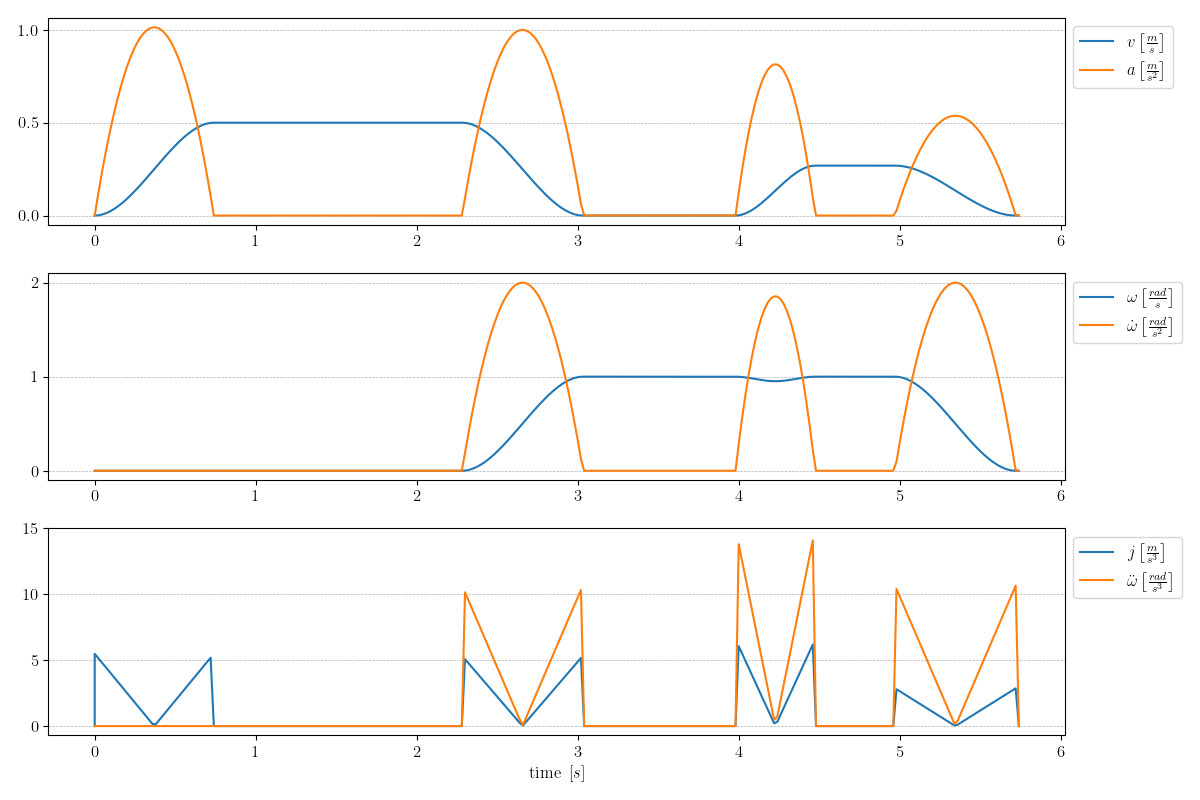

In [7]:
dt = 0.02
time_vec = np.arange(0, trajectory.time_vector[-1]+dt, dt)


# do online evaluation and plot the results
plot_trajectory_evaluation(trajectory, time_vec)

# Result: Dual Quaternion Pose, Velocity, Acceleration
---

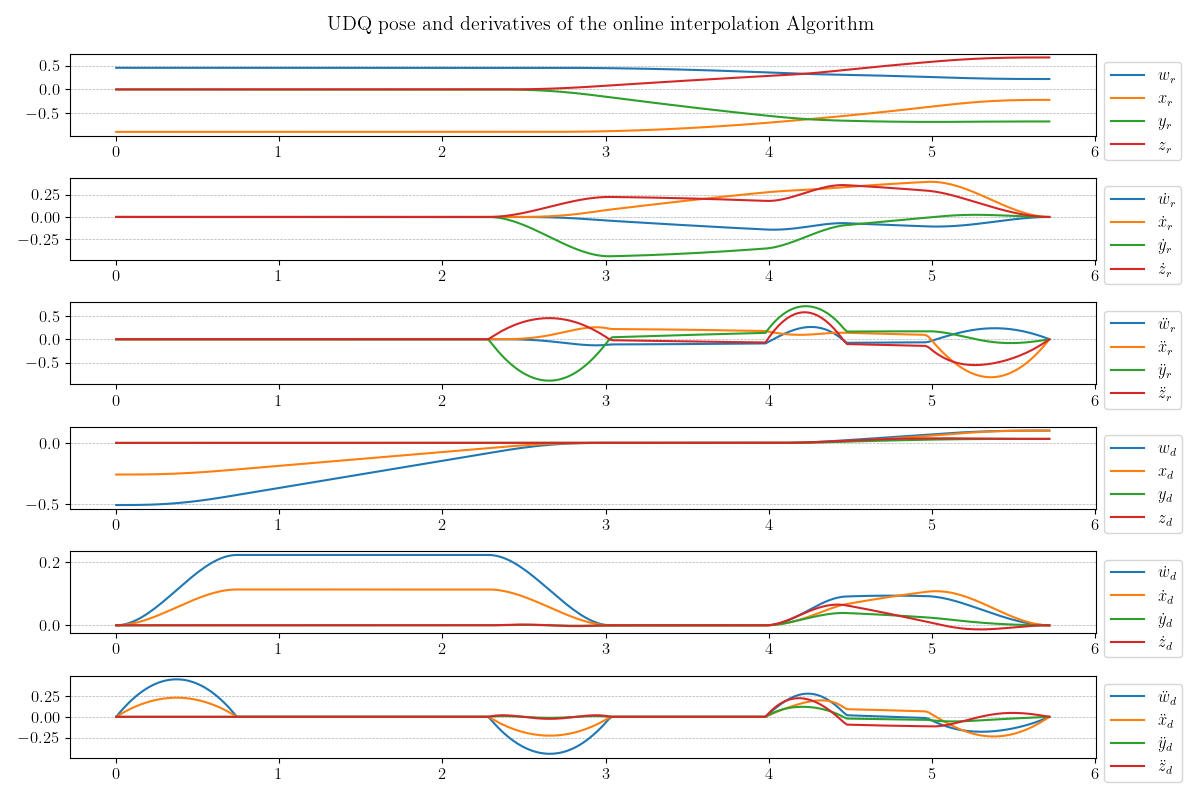

In [8]:
# do online evaluation and plot the results
plot_dual_quaternion_evaluation(trajectory, time_vec)

# Video Example of the Trajectory
---

In [11]:
%%HTML
<video width="1100" height="700" controls>
  <source src=".\resources\example_1.mov" type="video/mp4">
</video>



<div style="font-family: 'Helvetica Neue', Arial, sans-serif;padding: 10px; text-align: center;">


<div style="margin-top: 10px; display: flex;">
    <div style="max-width: 600px; margin-right: auto">
        <img src="./resources/neura_logo_groß.png" alt="Neura Robotics Logo" style="max-width: 100%; height: auto; object-fit: contain;">
    </div>
    <div style="max-width: 500px; margin-left: auto">
        <img src="./resources/rwth_igmr_de_rgb.png" alt="Neura Robotics Logo" style="max-width: 100%; height: auto; object-fit: contain;">
    </div>
</div>   
<h1 style="text-align: center;  margin-top: 80px"> Thank You For Your Attention! </h1>
<h3 style="text-align: left;  margin-top: 50px"> References: </h3>

---

<div style="width: 1400px; text-align: left;">
    <p>[1] Benjamin Kenwright. Dual-Quaternion Interpolation. 2023</p>
    <p>[2] Ken Shoemake. Animating rotation with quaternion curves. Proceedings of the 12th annual conference on Computer graphics and interactive techniques - SIGGRAPH ’85, pages 245–254, 1985</p>
    <p>[3] Felix Allmendinger, Sami Charaf Eddine, and Burkhard Corves. Coordinate-invariant rigid-body interpolation on a parametric C1 dual quaternion curve. Mechanism and Machine Theory, 121:731–744, March 2018</p>
    <p>[4] Jonas Wittmann, Lukas Cha, Marco Kappertz, Philipp Seiwald, and Daniel J. Rixen. Spherical Cubic Blends: $\mathcal{C}^2$-Continuous, Zero-Clamped, and Time-Optimized Interpolation of Quaternions. In 2023 IEEE International Conference on Robotics and Automation (ICRA), pages 8097–8103, May 2023</p>
</div>

</div>



